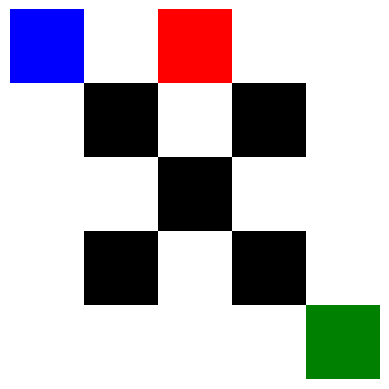

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
from IPython.display import clear_output

# Set up the environment
grid_size = 5
start = (0, 0)
target = (4, 4)
obstacles = [(1, 1), (1, 3), (2, 2), (3, 1), (3, 3)]
actions = ["up", "down", "left", "right"]
action_mapping = {"up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)}

# Initialize Q-table
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Hyperparameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 1.0  # exploration rate
epsilon_decay = 0.995

# Helper function to visualize the grid with integer mappings
def plot_grid(agent_pos):
    grid = np.zeros((grid_size, grid_size))  # Initialize with empty cells (0)
    grid[start] = 1  # Start position (1)
    grid[target] = 2  # Target position (2)
    for obs in obstacles:
        grid[obs] = 3  # Obstacles (3)
    grid[agent_pos] = 4  # Agent's current position (4)

    # Define colors for each cell type
    cmap = mcolors.ListedColormap(["white", "blue", "green", "black", "red"])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Plot the grid
    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.axis("off")
    plt.show()

# Environment function: take an action, return new position and reward
def step(position, action):
    new_position = (
        position[0] + action_mapping[action][0],
        position[1] + action_mapping[action][1]
    )
    # Boundary check
    if (0 <= new_position[0] < grid_size) and (0 <= new_position[1] < grid_size):
        if new_position in obstacles:
            return position, -1  # Penalize hitting an obstacle
        elif new_position == target:
            return new_position, 10  # Reward reaching the target
        else:
            return new_position, -0.1  # Small penalty to encourage faster solutions
    else:
        return position, -1  # Penalize moving out of bounds

# Training loop
for episode in range(100):
    position = start
    done = False

    while not done:
        clear_output(wait=True)
        plot_grid(position)
        time.sleep(0.2)  # Delay for visualization

        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action_index = np.random.randint(len(actions))  # Explore
        else:
            action_index = np.argmax(q_table[position[0], position[1]])  # Exploit
        action = actions[action_index]

        # Take action, observe new position and reward
        new_position, reward = step(position, action)

        # Update Q-value
        best_future_q = np.max(q_table[new_position[0], new_position[1]])
        q_table[position[0], position[1], action_index] += alpha * (
            reward + gamma * best_future_q - q_table[position[0], position[1], action_index]
        )

        # Move to new position
        position = new_position

        # End episode if target is reached
        if position == target:
            done = True

    # Decay epsilon
    epsilon *= epsilon_decay

print("Training completed!")

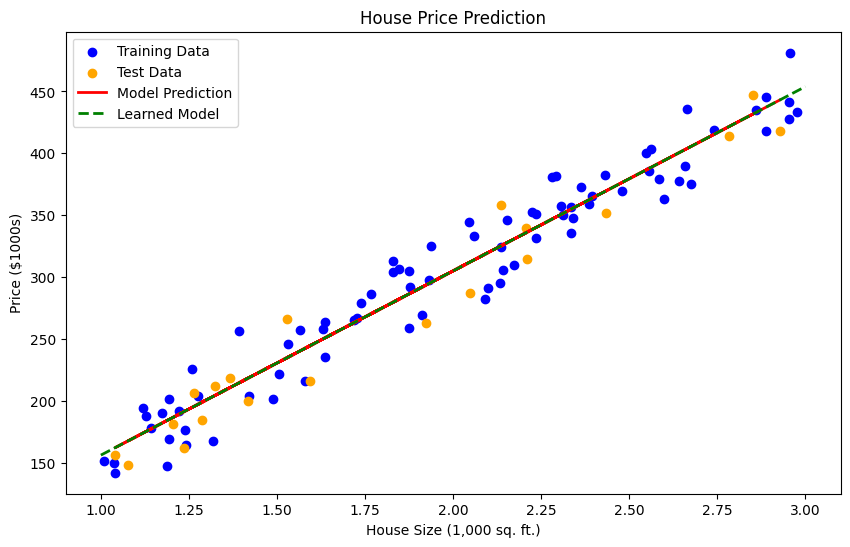

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data (continuous environment)
np.random.seed(0)
house_sizes = 2 * np.random.rand(100, 1) + 1  # House sizes between 1,000 and 3,000 square feet
house_prices = 150 * house_sizes + np.random.randn(100, 1) * 20  # Linear relationship with some noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(house_sizes, house_prices, test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)

# Visualize the training data and the model's predictions
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="orange", label="Test Data")

# Plot predictions on test data
plt.plot(X_test, predictions, color="red", linewidth=2, label="Model Prediction")

# Plot the learned linear model on the entire range
x_range = np.linspace(1, 3, 100).reshape(-1, 1)  # Sizes between 1,000 and 3,000 square feet
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color="green", linestyle="--", linewidth=2, label="Learned Model")

# Customize plot
plt.xlabel("House Size (1,000 sq. ft.)")
plt.ylabel("Price ($1000s)")
plt.title("House Price Prediction")
plt.legend()
plt.show()

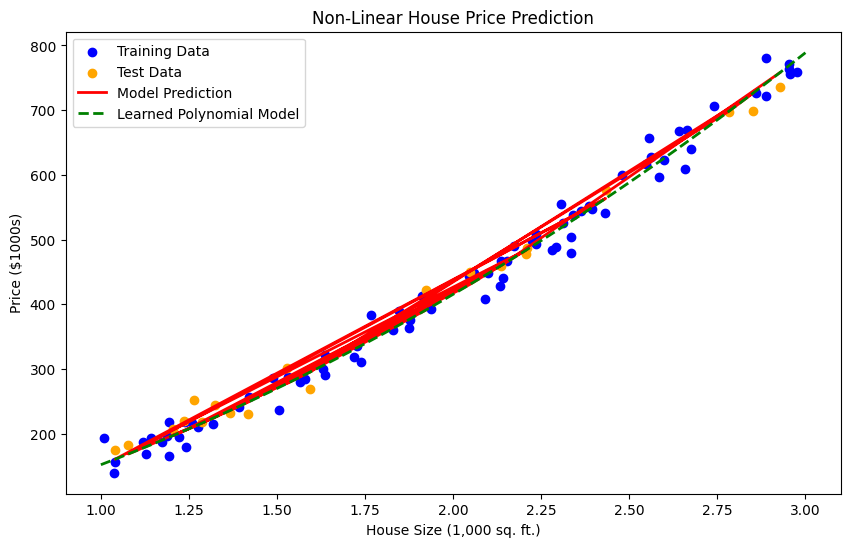

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data (non-linear relationship)
house_prices_nonlinear = 150 * house_sizes**1.5 + np.random.randn(100, 1) * 20  # Exponential relationship with noise

# Split the new dataset
X_train, X_test, y_train, y_test = train_test_split(house_sizes, house_prices_nonlinear, test_size=0.2, random_state=0)

# Create a pipeline for polynomial regression
degree = 2  # Degree of the polynomial
model_nonlinear = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_nonlinear.fit(X_train, y_train)

# Predict and plot
predictions_nonlinear = model_nonlinear.predict(X_test)

# Visualize the data and the polynomial model
plt.figure(figsize=(10, 6))

# Plot training and test data
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="orange", label="Test Data")

# Plot polynomial model prediction on test data
plt.plot(X_test, predictions_nonlinear, color="red", linewidth=2, label="Model Prediction")

# Plot the learned polynomial model on the full range
y_range_nonlinear = model_nonlinear.predict(x_range)
plt.plot(x_range, y_range_nonlinear, color="green", linestyle="--", linewidth=2, label="Learned Polynomial Model")

# Customize plot
plt.xlabel("House Size (1,000 sq. ft.)")
plt.ylabel("Price ($1000s)")
plt.title("Non-Linear House Price Prediction")
plt.legend()
plt.show()